In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/gabriel/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Lendo Datasets

In [3]:
df_faltantes_2019 = pd.read_csv('CleanData/Faltas2019.csv')
df_faltantes_2020 = pd.read_csv('CleanData/Faltas2020.csv')
df_faltantes_2021 = pd.read_csv('CleanData/Faltas2021.csv')

In [4]:
#Removendo colunas desnecessárias

df_faltantes_2019.drop(columns={'Unnamed: 0'},inplace=True)
df_faltantes_2020.drop(columns={'Unnamed: 0'},inplace=True)
df_faltantes_2021.drop(columns={'Unnamed: 0'},inplace=True)

In [4]:
df_faltantes_2021.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,...,QT_Pessoas_Moradia,Renda_Familiar,QT_Banheiros,QT_Quartos,QT_Carros,QT_Motos,QT_Geladeira,QT_Celular,QT_Computador,Acesso_Internet
0,2021,Entre 36 e 40 anos,F,Branca,1,concluiu,15,Não respondeu,Ferraz de Vasconcelos,SP,...,3.0,C,B,B,A,A,B,C,B,B
1,2021,25 anos,F,Parda,1,concluiu,9,Não respondeu,Cascavel,CE,...,1.0,B,B,B,A,A,B,B,A,B
2,2021,19 anos,F,Branca,1,concluiu,1,Não respondeu,Matão,SP,...,4.0,G,C,C,B,A,B,D,B,B
3,2021,20 anos,M,Preta,1,concluiu,3,Não respondeu,Rio de Janeiro,RJ,...,4.0,D,B,C,A,A,B,A,A,B
4,2021,20 anos,F,Preta,1,cursando,0,Pública,Salvador,BA,...,1.0,B,B,C,A,A,B,B,B,B


Para analisar o caso de alunos que se inscreveram para o exame mas não compareceram, pode-se levantar algumas questões e hipóteses:

- 1) Teve um aumento de candidatos faltantes nos anos de 2020 e 2021 (anos de pandemia) em relação ao ano de 2019?
- 2) Quais os estados que concentraram o maior número de candidatos faltantes?
- 3) Não possuir um meio de transporte em casa pode influenciar no não comparecimento no exame?

## 1) Número de participantes faltantes de 2019 a 2021

In [6]:
qtd_faltantes_2019 = df_faltantes_2019.shape[0]

1388642

In [8]:
qtd_faltantes_2020 = df_faltantes_2020.shape[0]

3130913

In [35]:
qtd_faltantes_2021 = df_faltantes_2021.shape[0]

Text(0.5, 1.0, 'Número de candidatos faltantes entre 2019 e 2021')

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


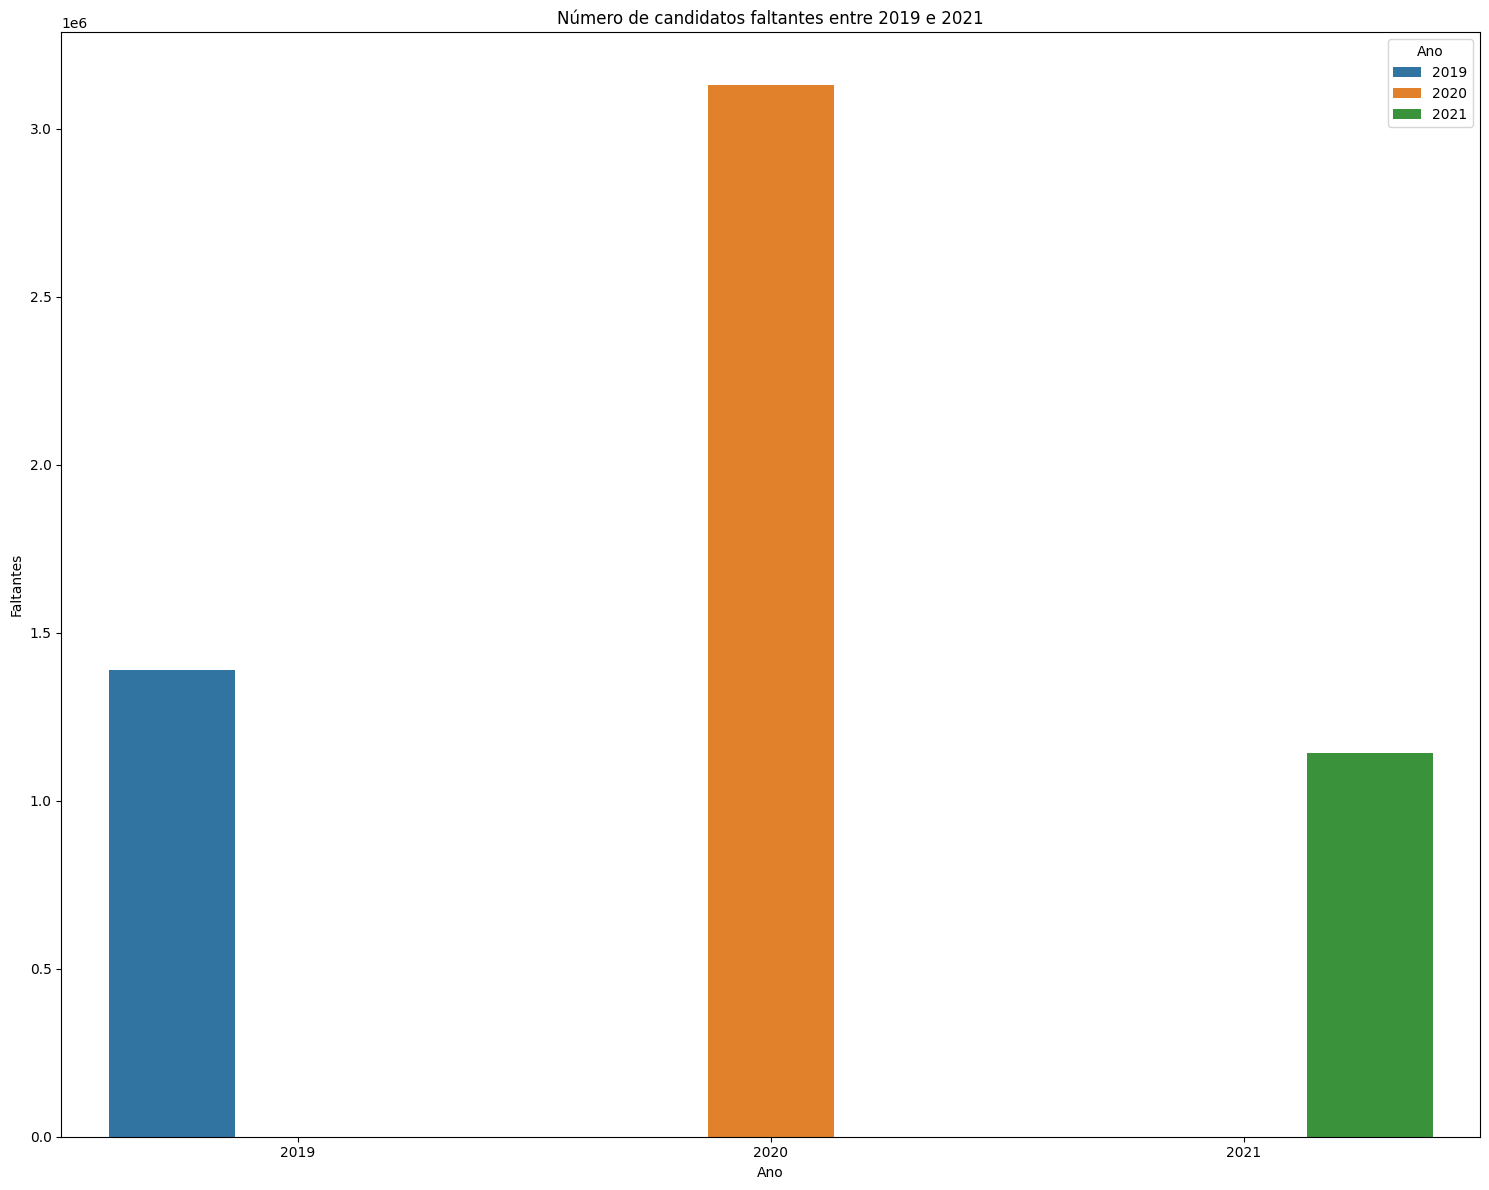

In [34]:
df_qtd_faltantes = pd.DataFrame({"ano": ["2019", "2020", "2021"], "count": [qtd_faltantes_2019, qtd_faltantes_2020, qtd_faltantes_2021]})

plt.figure(figsize=(15,12))
sns.barplot(data=df_qtd_faltantes,x='ano',y='count',hue='ano')
plt.xlabel('Ano')
plt.ylabel('Faltantes')
plt.legend(title='Ano')
plt.title('Número de candidatos faltantes entre 2019 e 2021')

Pode-se perceber que houve um aumento relevante de candidatos faltantes no ano de 2020 (primeiro ano da pandemia). Isso pode ter relação com fatores como um maior número de casos, lockdowns mais severos pelo país e ainda inexistência das vacinas.

## 2) Panorama geral por estados

<AxesSubplot: >

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


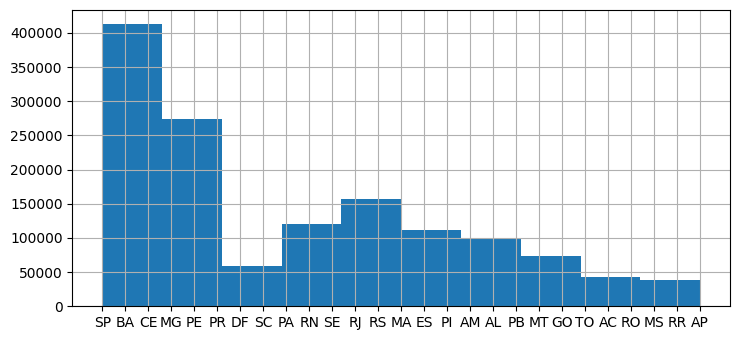

In [39]:
df_faltantes_2019['SG_UF_PROVA'].hist(bins=10)

<AxesSubplot: >

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


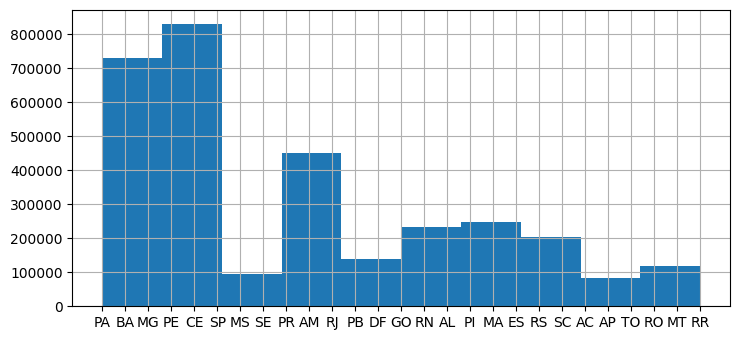

In [40]:
df_faltantes_2020['SG_UF_PROVA'].hist(bins=10)

<AxesSubplot: >

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


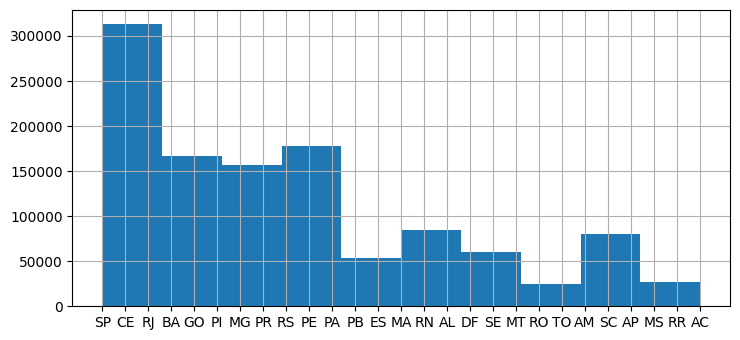

In [41]:
df_faltantes_2021['SG_UF_PROVA'].hist(bins=10)

Pode-se observar que SP sempre está entre os primeiros em número de candidatos faltantes, isso se deve ao maior número de candidatos inscritos no Estado. Mas um caso que chama a atenção é o do CE, que também apareceu entre os três primeiros nos três anos, mas não tem um grande número de candidatos comparado à SP, por exemplo.

## 3) Não ter um veículo pode influenciar na falta do exame?

Text(0.5, 1.0, 'Na sua residência tem pelo menos um veículo (carro ou moto)? - 2021')

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


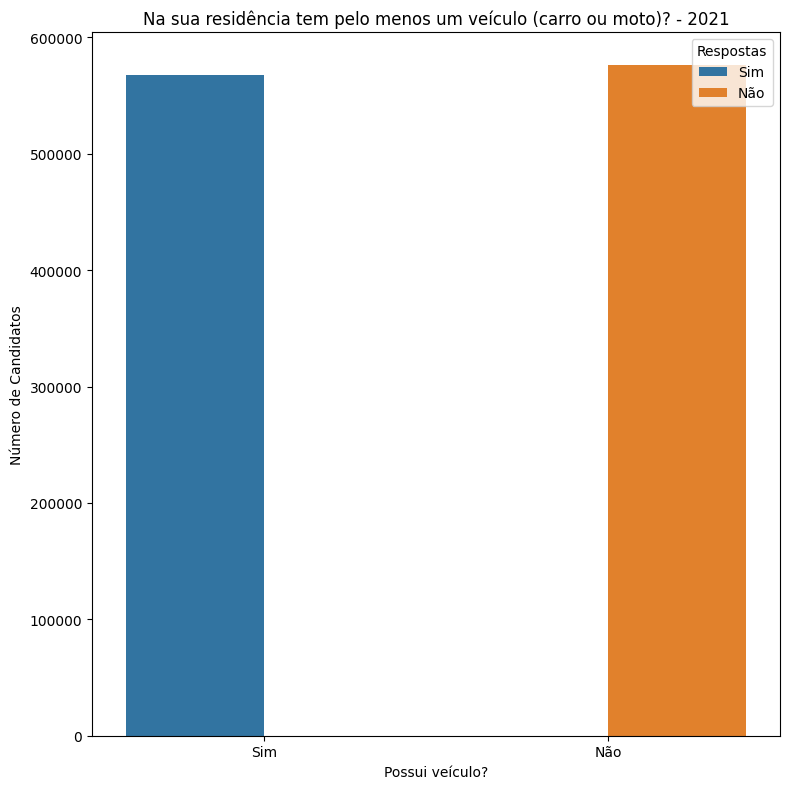

In [46]:
soma_sem_veiculos = len(df_faltantes_2021[(df_faltantes_2021.QT_Carros == 'A') & (df_faltantes_2021.QT_Motos == 'A')])

df_veiculos = pd.DataFrame({"possui_veiculo": ["Sim", "Não"], "count": [df_faltantes_2021.shape[0] - soma_sem_veiculos, soma_sem_veiculos]})
df_veiculos

plt.figure(figsize=(8,8))
sns.barplot(data=df_veiculos, x='possui_veiculo', y='count', hue='possui_veiculo')
plt.xlabel('Possui veículo?')
plt.ylabel('Número de Candidatos')
plt.legend(title='Respostas')
plt.title('Na sua residência tem pelo menos um veículo (carro ou moto)? - 2021')

Calculando a porcentagem:

In [168]:
df_veiculos['percent'] = (df_veiculos['count'] / df_veiculos['count'].sum()) * 100
df_veiculos

,possui_veiculo,count,percent
0,Sim,567619,49.635095
1,Não,575965,50.364905


Pode-se observar que o número de candidatos que possuem e não possuem veículos em casa é bem parecido, então não é possível concluir que uma possível dificuldade de locomoção para o local da prova é um fator determinante para o não comparecimento.